# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import pylab as pylab

from scipy.stats import normaltest

In [9]:
athletes = pd.read_csv("athletes.csv")

In [10]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [11]:
# Sua análise começa aqui.
df = athletes
df.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [12]:
df['height'].head()

0    1.72
1    1.68
2    1.98
3    1.83
4    1.81
Name: height, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [14]:
#Rejeitar h0 se o valor p<0.05
significancia = 0.05

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [20]:
def q1():
    # Retorne aqui o resultado da questão 1.
    stat_test_wilk, p_valor_wilk = sct.shapiro(get_sample(df, 'height', n=3000, seed=42))
    return p_valor_wilk >= significancia

In [24]:
q1()

True

In [25]:
stat_test_wilk, p_valor_wilk = sct.shapiro(get_sample(df, 'height', n=3000, seed=42))
print(p_valor_wilk)

5.681722541339695e-07


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

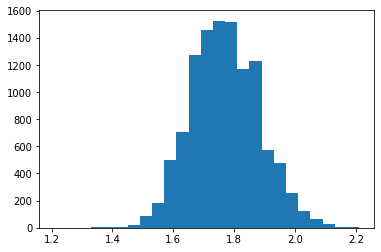

In [12]:
plt.hist(df['height'], bins=25);

* Conforme o histograma, verificamos que a maioria dos dados estão concentrados entre 1.7-1.8 com uma distribuição normal.

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([-28.47550596, -27.54478941, -27.16057199, ...,  37.76399345,
          38.98127318,  40.44065011])),
 (10.196683529927613, 4.954199930074629, 0.9998444714419091))

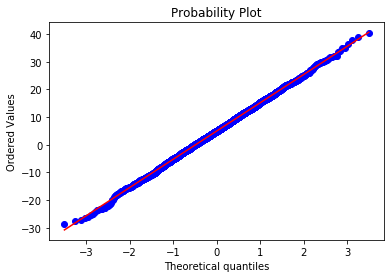

In [13]:
df_norm = df['height']
df_norm = sct.norm.rvs(loc=5, scale=10, size=3000)

sct.probplot(df_norm, dist="norm", plot=pylab)
#pylab.show()

* Observamos que nossos dados tem uma distribuição normal, conforme o grafico qqplot.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [23]:
def q2():
    # Retorne aqui o resultado da questão 2.
    stat_test_jarque, p_valor_jarque = jarque_bera_test = sct.jarque_bera(get_sample(df, 'height', n=3000, seed=42))
    return p_valor_jarque >= significancia

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [15]:
def q3():
    # Retorne aqui o resultado da questão 3.
    stat_test, p_valor = normaltest(get_sample(df, 'height', n=3000, seed=42))
    return p_valor >= significancia

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [16]:
def q4():
    # Retorne aqui o resultado da questão 4.
    stat_test_log, p_valor_log = normaltest(get_sample(df, 'height', n=3000, seed=42))
    return p_valor_log >= significancia

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [17]:
def q5():
    return bool(sct.ttest_ind(df.query('nationality==\"BRA\"')['height'],
                    df.query('nationality==\"USA\"')['height'], 
                    equal_var=False, nan_policy='omit')[1] > significancia)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [18]:
def q6():
    # Retorne aqui o resultado da questão 6.
    
    return bool(sct.ttest_ind(df.query('nationality==\"BRA\"')['height'],
                    df.query('nationality==\"CAN\"')['height'], 
                    equal_var=False, nan_policy='omit')[1] > significancia)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [19]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return float((sct.ttest_ind(df.query('nationality==\"USA\"')['height'],
    df.query('nationality==\"CAN\"')['height'],
    equal_var=False, nan_policy='omit')[1]).round(8))


__Para refletir__:

* O resultado faz sentido? Sim, T-teste calcula as médias de duas amostras independentes de sua pontuação.
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?